In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(font="AppleGothic", rc={"axes.unicode_minus":False})

In [23]:
df = pd.read_csv("data/weather_2010_2019.csv")
df.shape

(3652, 61)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   3652 non-null   int64  
 1   일시                   3652 non-null   object 
 2   평균기온(°C)             3652 non-null   float64
 3   최저기온(°C)             3652 non-null   float64
 4   최저기온 시각(hhmi)        3652 non-null   int64  
 5   최고기온(°C)             3651 non-null   float64
 6   최고기온 시각(hhmi)        3651 non-null   float64
 7   강수 계속시간(hr)          1424 non-null   float64
 8   10분 최다 강수량(mm)       890 non-null    float64
 9   10분 최다강수량 시각(hhmi)   649 non-null    float64
 10  1시간 최다강수량(mm)        890 non-null    float64
 11  1시간 최다 강수량 시각(hhmi)  652 non-null    float64
 12  일강수량(mm)             1424 non-null   float64
 13  최대 순간 풍속(m/s)        3650 non-null   float64
 14  최대 순간 풍속 풍향(16방위)    3650 non-null   float64
 15  최대 순간풍속 시각(hhmi)     3650 non-null   f

In [25]:
df["일시"] = pd.to_datetime(df["일시"])

In [26]:
df["연"] = df["일시"].dt.year
df["월"] = df["일시"].dt.month
df["일"] = df["일시"].dt.day
df["요일"] = df["일시"].dt.dayofweek

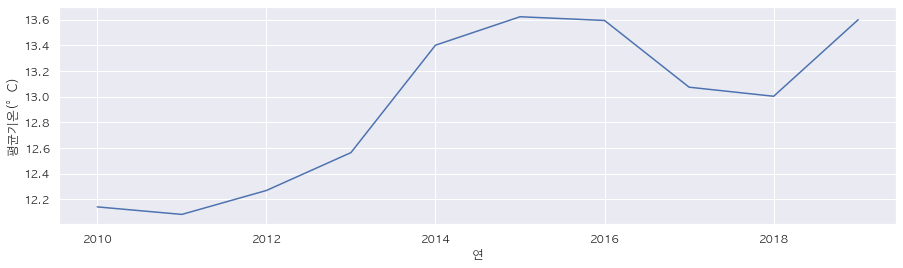

In [27]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연", y="평균기온(°C)", ci=None)

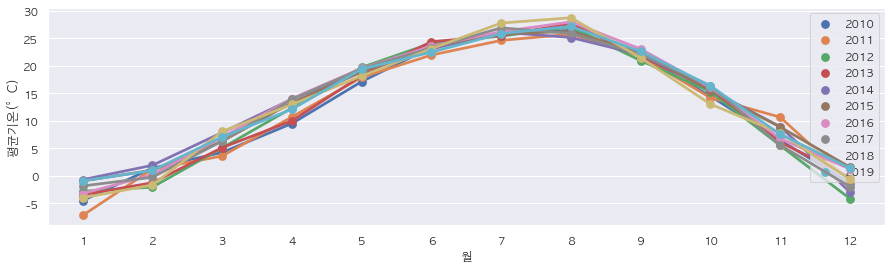

In [32]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df, x="월", y="평균기온(°C)", ci=None, hue="연")
plt.legend(loc=1)

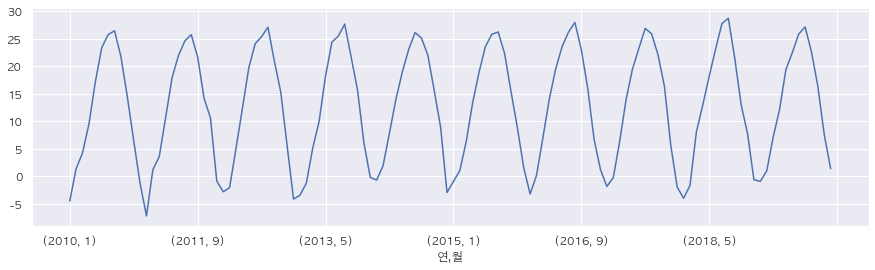

In [48]:
df.groupby(["연", "월"])["평균기온(°C)"].mean().plot(figsize=(15, 4))

In [39]:
year_month_temp = df.groupby(["연", "월"])["평균기온(°C)"].mean().unstack().round(1)
year_month_temp

월,1,2,3,4,5,6,7,8,9,10,11,12
연,,,,,,,,,,,,
2010,-4.5,1.4,4.3,9.5,17.2,23.4,25.8,26.5,21.8,14.5,6.5,-1.3
2011,-7.2,1.2,3.6,10.7,17.9,22.0,24.6,25.8,21.8,14.2,10.7,-0.9
2012,-2.8,-2.0,5.1,12.3,19.7,24.1,25.4,27.1,21.0,15.3,5.5,-4.1
2013,-3.4,-1.2,5.1,10.0,18.2,24.4,25.5,27.7,21.8,15.8,6.1,-0.2
2014,-0.7,1.9,7.9,14.0,18.9,23.1,26.1,25.2,22.1,15.6,9.0,-2.9
2015,-0.9,1.0,6.3,13.3,18.9,23.6,25.8,26.3,22.4,15.5,8.9,1.6
2016,-3.2,0.2,7.0,14.1,19.6,23.6,26.2,28.0,23.1,16.1,6.8,1.2
2017,-1.8,-0.2,6.3,13.9,19.5,23.3,26.9,25.9,22.1,16.4,5.6,-1.9
2018,-4.0,-1.6,8.1,13.0,18.2,23.1,27.8,28.8,21.5,13.1,7.8,-0.6


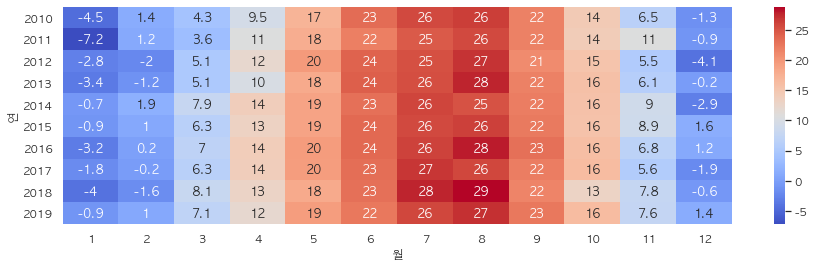

In [41]:
plt.figure(figsize=(15, 4))
sns.heatmap(year_month_temp, annot=True, cmap="coolwarm")

In [45]:
year_month_temp_median = df.groupby(["연", "월"])["평균기온(°C)"].median().unstack().round(1)
year_month_temp_median

월,1,2,3,4,5,6,7,8,9,10,11,12
연,,,,,,,,,,,,
2010,-5.0,0.6,4.5,9.2,17.3,23.2,26.0,26.5,23.2,15.8,6.4,-1.2
2011,-7.0,1.2,2.9,10.6,17.3,21.7,24.7,25.4,21.6,14.8,12.2,-1.7
2012,-2.8,-1.3,5.0,12.0,19.8,23.7,25.8,27.2,21.0,15.7,5.2,-4.5
2013,-3.5,-1.2,5.1,9.6,18.9,24.6,25.3,28.2,22.2,16.2,5.4,-0.5
2014,-0.1,2.3,6.8,14.6,19.6,23.4,26.4,24.9,22.0,16.0,9.4,-3.2
2015,-0.9,1.2,5.6,13.5,18.7,24.1,25.6,26.6,22.2,16.9,10.4,1.5
2016,-3.3,0.0,7.9,14.1,19.4,23.8,27.3,29.3,23.4,16.8,6.0,1.6
2017,-2.2,-0.2,7.1,14.2,20.0,23.6,26.8,26.3,22.4,16.6,4.8,-2.1
2018,-3.0,-0.8,7.6,13.7,18.1,22.9,28.2,29.9,22.0,13.2,8.1,0.0


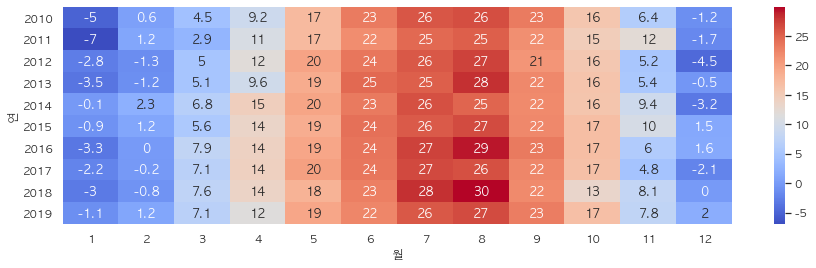

In [46]:
plt.figure(figsize=(15, 4))
sns.heatmap(year_month_temp_median, annot=True, cmap="coolwarm")